## Milestone 2 US Eastern Region Amenities

The purpose of this EDA is to do a simple EDA analysis to examine top amenities in aggregate on the following Eastern US cities:
* Broward County (FL)
* Jersey City (NJ)
* New York City (NY)
* Cambridge (MA)
* Washington DC

This will help us decide what amenities we should use in our feature engineering.

In [1]:
import pandas as pd
import spacy
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import mannwhitneyu
from statistics import mean
from scipy.stats import norm
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib.colors import ListedColormap
from collections import Counter
import geopandas as gpd
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import math
import ast

In [2]:
east_coast = pd.read_csv('east_coast_cleaned.csv',  na_filter=False)

In [3]:
east_coast.head()

,id,name,description,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,num_bath,bedrooms,beds,amenities,price,number_of_reviews,review_scores_value,calculated_host_listings_count,city,amenities_count
0,827736378366911479,Legion 1BR/1BA,Take it easy at this unique and tranquil getaway.,475630606,Sean,2022-08-18,Unknown,within an hour,100%,94%,...,1.0,1.0,1.0,"[""Air conditioning"", ""Free parking on premises...",222.0,0,,1,Broward County,10
1,592589963829194972,Club Wyndham Royal Vista,"Located directly on the beach, the property si...",66506549,Ryan,2016-04-09,"Alpharetta, GA",within an hour,98%,16%,...,2.0,2.0,4.0,"[""TV"", ""Paid parking on premises"", ""Indoor fir...",500.0,0,,5,Broward County,29
2,772438920837360569,Relaxing 5 Acre Ranch home with private pond!,Relax with the whole family at this peaceful p...,382318476,Maggie,2020-12-30,Unknown,within an hour,100%,89%,...,3.0,4.0,6.0,"[""Air conditioning"", ""Free parking on premises...",500.0,2,5.0,1,Broward County,14
3,33271346,Beach Escape – One Block from the Beach!,Newly constructed and beautifully renovated Ke...,118856968,Steve And Jo,2017-03-02,"Fort Lauderdale, FL",within an hour,100%,100%,...,2.0,2.0,4.0,"[""TV"", ""Hair dryer"", ""Essentials"", ""Wifi"", ""Ha...",186.0,129,4.68,3,Broward County,22
4,484515,MIAMI- AMAZING APARTMENT OVER BEACH,<b>The space</b><br />The apartment is located...,637272,Bianca,2011-05-28,"Buenos Aires, Argentina",within an hour,95%,26%,...,2.0,2.0,5.0,"[""Air conditioning"", ""Hangers"", ""Free parking ...",297.0,27,4.44,6,Broward County,17


C:\Users\tiffa.TIFFANY\AppData\Local\Temp\ipykernel_22736\2486638122.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_list = east_coast['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',')


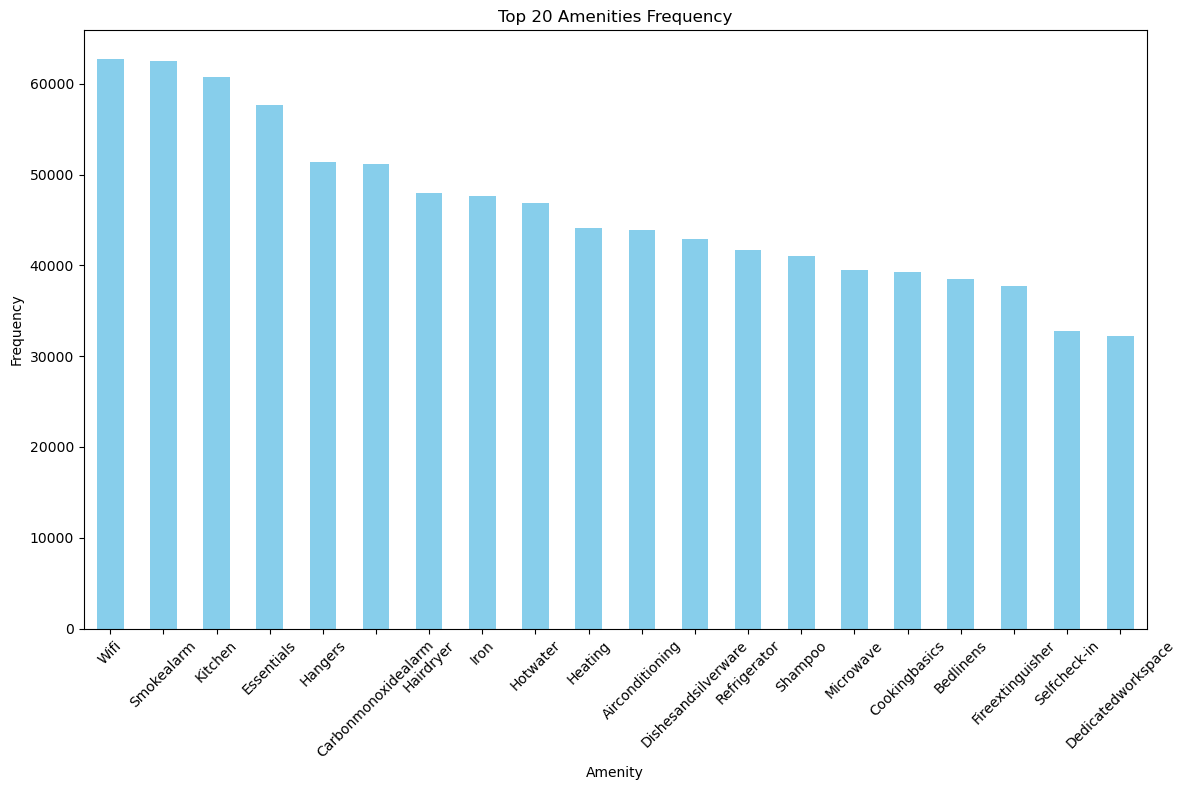

In [4]:


# Assuming listings_detailed['amenities'] contains the list of amenities for each listing


# Flatten the list of amenities
amenities_list = east_coast['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',')


# Count the occurrences of each amenity
amenities_counts = pd.Series([amenity for sublist in amenities_list for amenity in sublist]).value_counts()


# Select the top 10 most common amenities
top_10_amenities = amenities_counts.head(20)


# Plotting
plt.figure(figsize=(12, 8))
top_10_amenities.plot(kind='bar', color='skyblue')
plt.title('Top 20 Amenities Frequency')
plt.xlabel('Amenity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
